In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
dd = pd.read_csv('xx.psl', sep='\t')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(dd) # >=200, Q>

['match',
 'mis- ',
 'rep. ',
 "N's",
 'Q gap',
 'Q gap.1',
 'T gap',
 'T gap.1',
 'strand',
 'Q        ',
 'Q   ',
 'Q    ',
 'Q  ',
 'T        ',
 'T   ',
 'T    ',
 'T  ',
 'block',
 'blockSizes ',
 'qStarts',
 ' tStarts']

In [5]:
dd.head(2)

,match,mis-,rep.,N's,Q gap,Q gap.1,T gap,T gap.1,strand,Q,...,Q,Q,T,T,T,T,block,blockSizes,qStarts,tStarts
0,,match,match,,count,bases,count,bases,,name,...,start,end,name,size,start,end,count,NaN,NaN,NaN
1,230,3,0,0,5,12,5,213,-,cffcb8a3-a78b-4d98-b40b-f79eaafb47c5_15.19_107...,...,25,270,chr11,135086622,57327424,57327870,8,"50,20,10,14,32,35,59,13,","119,173,198,208,223,255,291,351,","57327424,57327481,57327508,57327714,57327728,5..."


In [6]:
dd = dd.rename(index=str, columns={'mis- ': 'mismatch', 'rep. ': 'repmatch', 'Q gap':"Q gap count", "Q gap.1":"Q gap bases",
                             "T gap":"T gap count", "T gap.1":"T gap bases", "Q        ":"Q name", 
                             "Q   ":"Q size", "Q    ":"Q start", "Q  ":"Q end", "T        ":"T name",
                             "T   ":"T size", "T    ":"T start", "T  ":"T end", "block":"block count",
                             "blockSizes ":"blockSizes", ' tStarts':'tStarts'})

In [7]:
dd = dd.drop(dd.index[[0]])
dd = dd.reset_index()

In [8]:
dd.groupby(['Q name'])

In [9]:
dd.groupby(["Q name"], sort=False).apply(lambda x: x.sort_values(["T name"])) 

,,index,match,mismatch,repmatch,N's,Q gap count,Q gap bases,T gap count,T gap bases,strand,...,Q start,Q end,T name,T size,T start,T end,block count,blockSizes,qStarts,tStarts
Q name,,,,,,,,,,,,,,,,,,,,,,
cffcb8a3-a78b-4d98-b40b-f79eaafb47c5_15.19_1070_1_696_309,0,1,230,3,0,0,5,12,5,213,-,...,25,270,chr11,135086622,57327424,57327870,8,"50,20,10,14,32,35,59,13,","119,173,198,208,223,255,291,351,","57327424,57327481,57327508,57327714,57327728,5..."
02d6397c-61b1-4780-9588-aa74ba07921b_16.44_1303_1_664_273,1,2,234,2,0,0,1,9,5,215,-,...,20,265,chr11,135086622,57327424,57327875,6,"13,33,37,17,21,115,","88,110,143,180,197,218,","57327424,57327447,57327481,57327718,57327737,5..."
c1a27b51-35cd-400f-af82-dfacf3aec7f6_14.86_1295_1_650_272,2,3,244,0,0,0,2,6,6,207,-,...,20,270,chr11,135086622,57327424,57327875,8,"21,23,39,4,24,28,63,42,","82,103,126,165,169,193,222,290,","57327424,57327446,57327470,57327510,57327711,5..."
8db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328_1_662_284,3,4,262,1,0,0,2,2,6,1295,-,...,16,281,chr2,242193529,25234223,25235781,9,"6,59,78,28,18,31,31,5,7,","83,89,148,226,254,272,303,335,341,","25234223,25234234,25234294,25234373,25234402,2..."
1247352a-7bf9-4384-9154-c4fadd6f540e_15.54_1203_1_657_269,4,5,248,2,0,0,3,5,8,1308,-,...,18,273,chr2,242193529,25234223,25235781,9,"6,18,9,46,50,51,7,39,24,","76,82,102,111,157,209,260,268,307,","25234223,25234234,25234257,25234267,25234316,2..."
942a7808-ef2c-450d-9442-ecfa808c49c5_16.07_1773_1_668_294,5,6,278,0,0,0,1,2,7,738,-,...,20,300,chr11,135086622,57326859,57327875,8,"30,60,23,4,28,112,11,10,","74,104,164,187,191,219,333,344,","57326859,57327425,57327486,57327510,57327711,5..."
cadc0d4d-ecc7-4630-992d-63652c4d5343_15.21_1170_1_655_273,6,7,222,4,0,0,4,23,7,225,-,...,20,269,chr11,135086622,57327424,57327875,8,"45,15,24,25,17,9,55,36,","84,129,144,169,194,221,236,297,","57327424,57327470,57327486,57327710,57327736,5..."
f288bb60-751a-444d-acad-cc781e4a7edc_13.29_1921_1_650_270,7,8,232,5,0,0,0,0,9,213,-,...,22,259,chr11,135086622,57327424,57327874,10,"32,11,46,8,6,26,34,54,16,4,","91,123,134,180,188,194,220,254,308,324,","57327424,57327457,57327470,57327718,57327727,5..."
bf0131c1-a637-486d-8ae8-e97a889ca109_15.69_1572_1_661_284,8,9,247,2,0,0,2,5,3,202,-,...,20,274,chr11,135086622,57327424,57327875,5,"70,20,22,118,19,","90,162,182,204,325,","57327424,57327494,57327711,57327734,57327856,"


In [10]:
tt = dd[['Q name', 'T name']]

In [11]:
dd['T name'].value_counts().plot(kind='bar')

In [12]:
dd['Q size'] = dd['Q size'].astype('int64')
dd['Q start'] = dd['Q start'].astype('int64')
dd['Q end'] = dd['Q end'].astype('int64')

In [13]:
dd.shape

(43113, 22)

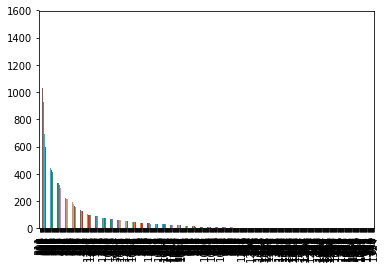

In [14]:
dd['Q size'].value_counts().plot(kind='bar')

In [37]:
tt = dd[dd['Q end'] - dd['Q start'] > 200]#200
print(tt.shape)

(24464, 22)


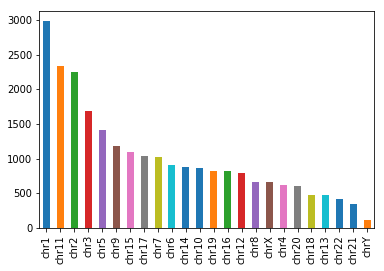

In [38]:
tt['T name'].value_counts().plot(kind='bar')

In [34]:
#qstart and q end to create bed file, 

In [39]:
f = open("xx200.bed", "w")
for index, row in tt.iterrows():
    f.write(row["T name"]+'\t'+str(row["T start"])+'\t'+str(row["T end"])+'\n')
f.close()

In [56]:
i=0
j=0
f = open("xx200-" + str(j) + ".bed", "w")
for index, row in tt.iterrows(): 
    f.write(row["T name"]+'\t'+str(row["T start"])+'\t'+str(row["T end"])+'\n')
    i += 1
    if i%1000 == 0:
        f.close()
        j += 1
        f = open("xx200-" + str(j) + ".bed", "w")
f.close()

In [57]:
yy = pd.read_csv('yy844.bed', sep='\t')

In [58]:
yy.head()

,#hg38.knownGene.chrom,hg38.kgXref.geneSymbol
0,chr9,KDM4C
1,chr9,KDM4C
2,chr9,KDM4C
3,chr9,KDM4C
4,chr9,KDM4C


In [59]:
print(yy.shape)
len(set(yy['hg38.kgXref.geneSymbol']))

(3747, 2)


186

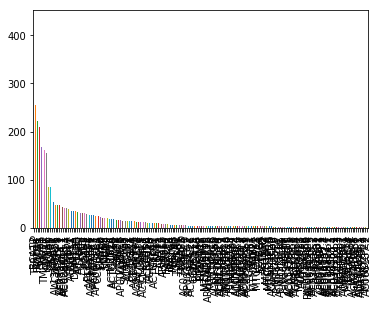

In [60]:
yy['hg38.kgXref.geneSymbol'].value_counts().plot(kind='bar')

In [61]:
yy['hg38.kgXref.geneSymbol'].value_counts()

BCAT2         430
TERF2IP       255
FRMD5         222
ACTG1         209
ACTB          168
FNIP1         164
TMEM222       162
KDM4C         156
AMY2B          86
KARS           85
SSRP1          75
KANTR          54
AL139042.1     47
ACTG1P21       47
ACTBP8         47
AL080243.1     45
AC233964.1     44
AC026410.1     42
AC008695.1     41
AMY2A          40
ACTBP7         37
ACTBP11        36
AMY1A          36
DNMT3A         36
POTEI          34
ACTBP1         31
ACTBP9         30
POTEJ          30
SYN2           30
POTEE          28
             ... 
AC034102.2      1
MIR6801         1
RAB32           1
MTCO1P7         1
AP002414.1      1
AC018865.2      1
AC068137.4      1
AC034102.7      1
AC018804.1      1
KLF2P2          1
AC018865.1      1
AC034102.1      1
AC010320.2      1
MTCO2P7         1
AC034102.3      1
MTATP6P7        1
MTCO3P7         1
AC068137.1      1
MTND5P29        1
B3GALT4         1
TUBA3E          1
AC025162.1      1
MTND6P8         1
AC034102.5      1
MYL12AP1  

In [7]:
int = pd.read_csv('int.bed', sep='\t',header=None)
print(int.shape)

(11737, 7)


In [31]:
int.columns = ['Chr','Start','End','GeneSymbl','Len','Frac', 'Count']
int['Frac'] = int['Frac'].astype(float)
int.head()

,Chr,Start,End,GeneSymbl,Len,Frac,Count
0,chr1,925737,944575,SAMD11,373,0.019800,1
1,chr1,925740,944581,SAMD11,379,0.020116,1
2,chr1,925740,944581,SAMD11,379,0.020116,1
3,chr1,925740,944581,SAMD11,379,0.020116,1
4,chr1,925740,944581,SAMD11,379,0.020116,1


In [43]:
intsub = int[int['Frac']>0.1]
intsub = int[['Chr', 'GeneSymbl', 'Count']]
intsub = intsub.groupby(['GeneSymbl']).sum()

In [45]:
intsub = intsub.sort_values(by=['Count'], ascending=False)

In [48]:
intsub.shape

(2986, 1)

In [49]:
intsub

,Count
GeneSymbl,
MAP3K13,3056
FHIT,1023
PPIA,864
ACTB,710
TMEM222,495
TESK2,411
RPL4P4,381
RPL4P5,379
RPL4P3,369


In [50]:
intsub.to_csv("intsub.csv")